In [1]:
%matplotlib inline
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from toolbox.astro import angsep
plt.style.use('jpg')

In [2]:
mycatDIR = '../data/mycats/'
cat = Table.read(mycatDIR+'hsc_yang_all_regions.fits')
print len(cat), 'objects in catalog'
print np.unique(cat['group_id']).size, 'galaxy groups'
print len(cat[cat['bright']==1]), 'bcgs in catalog \n'
print 'column names:'
print cat.colnames

1642 objects in catalog
218 galaxy groups
218 bcgs in catalog 

column names:
['id', 'parent', 'tract', 'patch', 'ra', 'dec', 'i_deblend_nchild', 'i_classification_extendedness', 'group_id', 'bright', 'match_sep', 'z', 'Ngal', 'Mh_Lest', 'Mh_Mest', 'g-r', 'Mr']


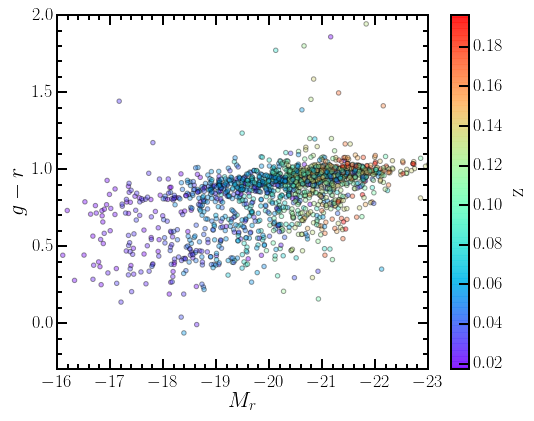

In [3]:
f1, a1 = plt.subplots(figsize=(8,6))
cmap = plt.cm.rainbow
sc = a1.scatter(cat['Mr'], cat['g-r'], c=cat['z'], marker='o',
                alpha=0.4, cmap=cmap, rasterized=True)
cbar = f1.colorbar(sc)
cbar.set_label('z')
cbar.solids.set_edgecolor("face")
a1.set_xlabel('$M_r$')
a1.set_ylabel('$g-r$')
a1.set_ylim(-0.3, 2)
a1.set_xlim(-23, -16)
a1.minorticks_on()
a1.invert_xaxis()

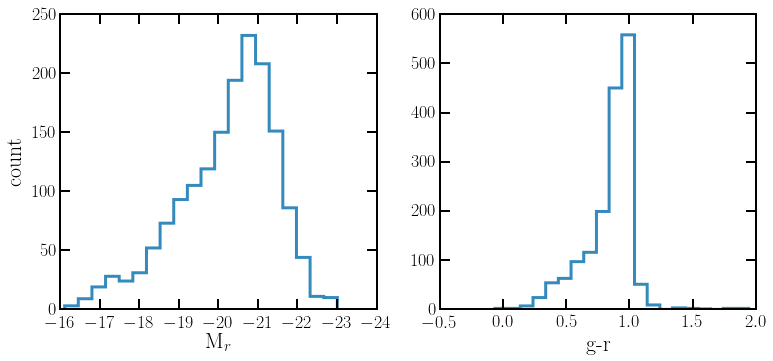

In [4]:
f2, a2 = plt.subplots(1,2,figsize=(12,5))
a2[0].hist(cat['Mr'], bins=20, histtype='step', lw=3)
a2[0].invert_xaxis()
a2[0].set_xlabel('M$_r$')
a2[0].set_ylabel('count')

a2[1].hist(cat['g-r'], bins=20, histtype='step', lw=3)
a2[1].set_xlabel('g-r');

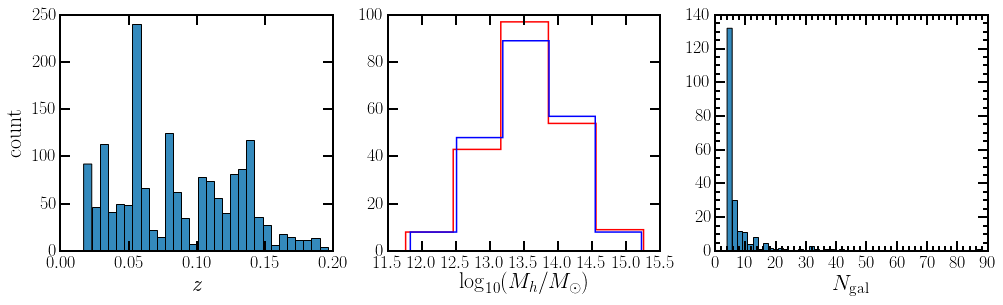

In [5]:
gal_num_1 = cat.group_by('group_id')[cat.group_by('group_id').groups.indices[:-1]]
Mh_Lest = gal_num_1['Mh_Lest']
Mh_Mest = gal_num_1['Mh_Mest']
Ngal = gal_num_1['Ngal']

f3, a3 = plt.subplots(1,3,figsize=(16,4))
a3[0].hist(cat['z'],bins=30)
a3[0].set_xlabel('$z$')
a3[0].set_ylabel('count')
a3[1].hist(Mh_Lest[Mh_Lest>5], color='r', bins=5, histtype='step', lw=1.5)
a3[1].hist(Mh_Mest[Mh_Mest>5], color='b', bins=5, histtype='step', lw=1.5)
a3[1].set_xlabel('$\log_{10}(M_h/M_\odot)$')
a3[2].hist(Ngal, bins=50)
a3[2].set_xlabel('$N_\mathrm{gal}$')
a3[2].minorticks_on();

### Angular sizes of the groups

I will extract 9 Mpc$^2$ squares centered on each group. Assuming the angular diameter distance to each group, this corresponds to the angular widths $\theta$ shown below.

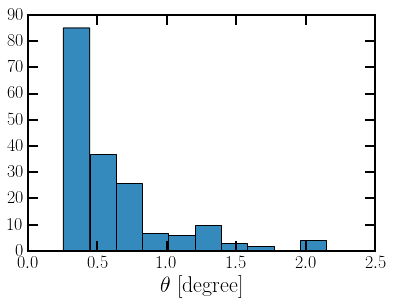

In [6]:
groups = Table.read('../data/groups/group_info.csv')
f4, a4 = plt.subplots()
a4.hist((180.0/np.pi)*3.0/groups['D_A'], bins=10)
a4.set_xlabel(r'$\theta$\ [degree]');